In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import solve_ivp
import matplotlib as mpl
import ipywidgets
from google.colab import widgets
plt.style.use("classic")
plt.style.use("seaborn-v0_8")
folder = "/content/drive/MyDrive/workbench/projects/P024_thesis/inputs/thesis/datasets/chap_02"

# Mastering simple IVPs

## Functions

In [ ]:
def exp_decay(t, y):
    return -0.8 * y

def exp_growth(t, y):
    return 0.8 * y

def falling(t, y):
    return 1 - (y/0.5)

def population(t, y):
    return y - 0.5

def asym_growth(t, y):
    return - (2 * y) + (np.exp(4 * t / 3) / 2)

def asym_decay(t, y):
    return - (2 * y) + (np.exp(- 4 * t / 3) / 2)


def logistic(t, y):
    r = 1.5
    K = 0.8
    T = 0.2
    return - r * (1 - (y/T)) * (1 - (y/K)) * y

funcs = {
    "Logistic": logistic,
    "AsymDecay": asym_decay,
    "AsymGrowth": asym_growth,
    "Population": population,
    "Falling": falling,
    "ExpDecay": exp_decay,
    "ExpGrowth": exp_growth,
}
func_picker = ipywidgets.Dropdown(options=list(funcs.keys()), value=list(funcs.keys())[0])

## Grid setup

In [ ]:
# Create a grid of points
tlim = [0, 1.6]
ylim = [0, 1]
size = 20
t, y = np.meshgrid(
    np.linspace(tlim[0], tlim[1], size),
    np.linspace(ylim[0], ylim[1], size)
    )

Print meshgrid

In [ ]:
print("t:")
print(np.round(t, 1))
print("y:")
print(np.round(y, 1))

Plot grid

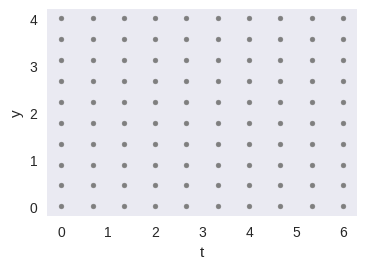

In [ ]:
plt.figure(figsize=(4, 4))
plt.scatter(t, y, marker=".", color="tab:grey")
plt.ylabel("y")
#plt.ylim(ylim)
plt.xlabel("t")
#plt.xlim(tlim)
plt.gca().set_aspect('equal')
plt.grid(False)
plt.show()

## Field

Choose function

In [ ]:
func_picker

Dropdown(options=('Logistic', 'AsymDecay', 'AsymGrowth', 'Population', 'Falling', 'ExpDecay', 'ExpGrowth'), va…

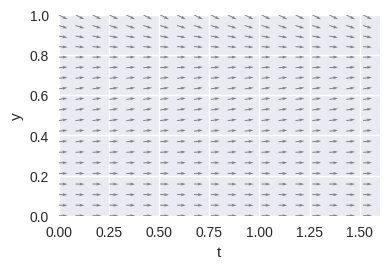

In [ ]:
# get vectors
v = funcs[func_picker.value](t=t, y=y)
u = np.ones(shape=y.shape)

plt.figure(figsize=(4, 4))
plt.quiver(t, y, u, v, color="tab:gray")
plt.ylabel("y")
plt.ylim(ylim)
plt.xlabel("t")
plt.xlim(tlim)
#plt.grid(False)
plt.gca().set_aspect('equal')
plt.tight_layout()
#plt.show()
plt.savefig("./fig_field_{}.jpg".format(func_picker.value), dpi=300)

## Solver

In [ ]:
func_picker

Dropdown(options=('Logistic', 'AsymDecay', 'AsymGrowth', 'Population', 'Falling', 'ExpDecay', 'ExpGrowth'), va…

In [ ]:
# set of initial values
y0=np.linspace(0.05 * ylim[0], 0.95* ylim[1], 7)
# time step resolution
tres = 20

Run

In [ ]:
solution = solve_ivp(
    fun=funcs[func_picker.value],
    t_span=tlim,
    y0=y0,
    t_eval=np.linspace(tlim[0], tlim[1], tres)
    )
print(solution)
print(type(solution))

Plot solutions

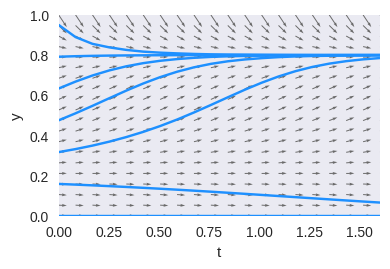

In [ ]:
v = funcs[func_picker.value](t=t, y=y)
u = np.ones(shape=y.shape)

plt.figure(figsize=(4, 4))
for i in range(len(y0)):
    inv = y0[i]
    label = "$y_0$ = {:.1}".format(inv)
    plt.plot(solution.t, solution.y[i], label=label, color="dodgerblue")
#plt.legend(frameon=True, facecolor="white")
plt.quiver(t, y, u, v, color="dimgray")
plt.ylabel("y")
plt.ylim(ylim)
plt.xlabel("t")
plt.xlim(tlim)
plt.gca().set_aspect('equal')
plt.tight_layout()
plt.grid(False)
plt.savefig("{}/fig_ivp_{}.jpg".format(folder, func_picker.value), dpi=300)

 # Moving towards Systems

## Grid setup

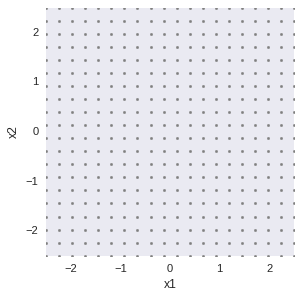

In [ ]:
# Create a grid of points
w = 2.5
x1lim = [-w, w]
x2lim = [-w, w]
size = 20
x1, x2 = np.meshgrid(
    np.linspace(x1lim[0], x1lim[1], size),
    np.linspace(x2lim[0], x2lim[1], size)
    )

plt.figure(figsize=(4, 4))
plt.scatter(x1, x2, marker=".", color="tab:grey")
plt.ylabel("x2")
plt.ylim(x2lim)
plt.xlabel("x1")
plt.xlim(x1lim)
plt.gca().set_aspect('equal')
plt.grid(False)
plt.show()

Random

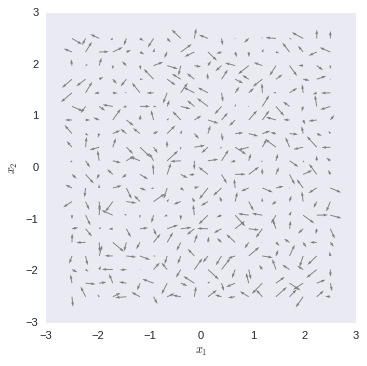

In [ ]:
np.random.seed(100)
dx1 = np.random.uniform(low=-1, high=1, size=x1.shape)
dx2 = np.random.uniform(low=-1, high=1, size=x2.shape)

plt.figure(figsize=(5, 5))
plt.quiver(x1, x2, dx1, dx2, color="tab:gray")
#plt.ylim(x2lim)
plt.ylabel("$x_2$")
plt.xlabel("$x_1$")
#plt.xlim(x1lim)
plt.gca().set_aspect('equal')
plt.grid(False)
plt.show()

## Functions

In [ ]:
def dx1_dt(x1, x2):
    return (a1 * x1) + (a2 * x2)

def dx2_dt(x1, x2):
    return (b1 * x1) + (b2 * x2)

def dX_dt(X):
    return np.array(
        [a1 * X[0] + a2 * X[1],
         b1 * X[0] + b2 * X[1]])

## Coefs -- Widgets

In [ ]:
wid_a1 = ipywidgets.FloatSlider(
    value=1.0,
    min=-5.0,
    max=5.0,
    step=0.1,
    description='a1:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
wid_a2 = ipywidgets.FloatSlider(
    value=1.0,
    min=-5.0,
    max=5.0,
    step=0.1,
    description='a2:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
wid_b1 = ipywidgets.FloatSlider(
    value=1.0,
    min=-5.0,
    max=5.0,
    step=0.1,
    description='b1:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
wid_b2 = ipywidgets.FloatSlider(
    value=1.0,
    min=-5.0,
    max=5.0,
    step=0.1,
    description='b2:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

## Vector Simulation

In [ ]:
ui = ipywidgets.VBox([wid_a1, wid_a2, wid_b1, wid_b2])
display(ui)

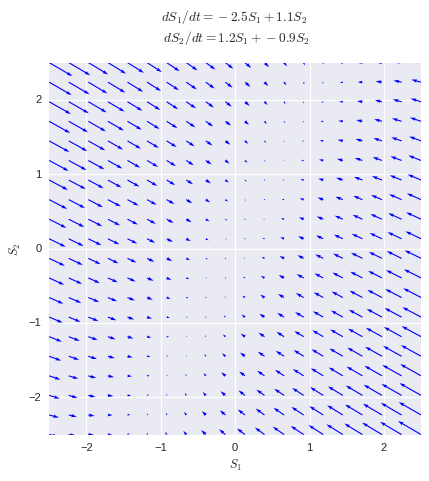

In [ ]:
# get coefs from widgets
a1 = wid_a1.value
a2 = wid_a2.value
b1 = wid_b1.value
b2 = wid_b2.value
# call funcs
#dx1 = dx1_dt(x1, x2)
#dx2 = dx2_dt(x1, x2)
dx1, dx2 = dX_dt(X=[x1, x2])
# scalar
s = np.sqrt(np.power(dx1, 2) + np.power(dx2, 2))

plt.figure(figsize=(6, 6))
# normalised arrow size by scalar (cmap feature)
plt.quiver(x1, x2, dx1, dx2, color="blue")
plt.title(
    "$dS_1/dt = {}S_1 + {}S_2$ \n $dS_2/dt = {}S_1 + {}S_2$ \n".format(
        a1, a2, b1, b2))
plt.ylabel("$S_2$")
plt.xlabel("$S_1$")
plt.xlim(x1lim)
plt.ylim(x2lim)
plt.gca().set_aspect('equal')
#plt.grid(False)
plt.show()

## SAL

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

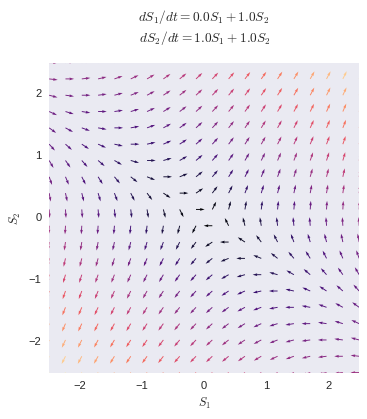

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

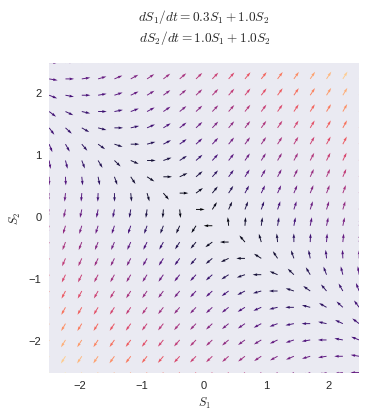

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

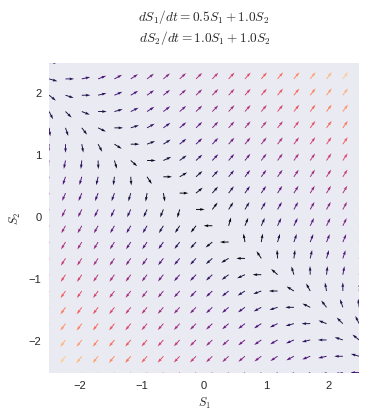

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

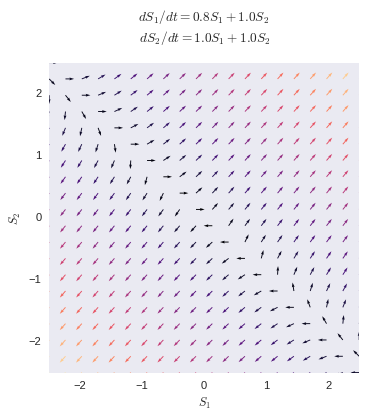

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

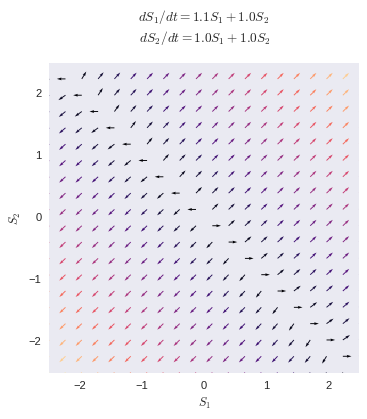

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

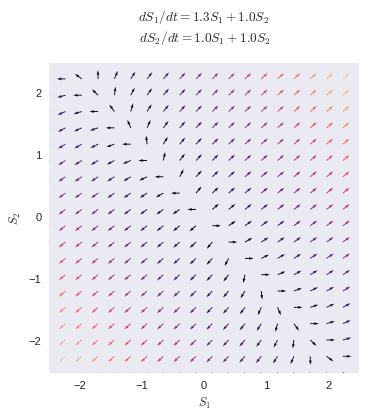

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

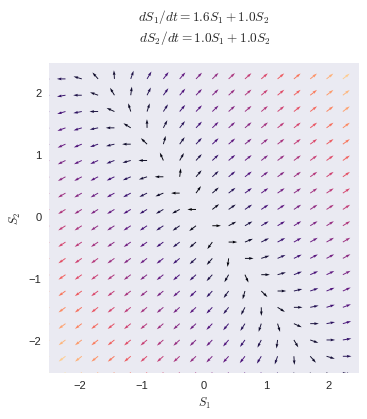

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

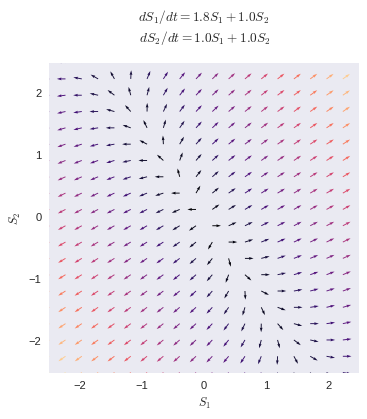

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

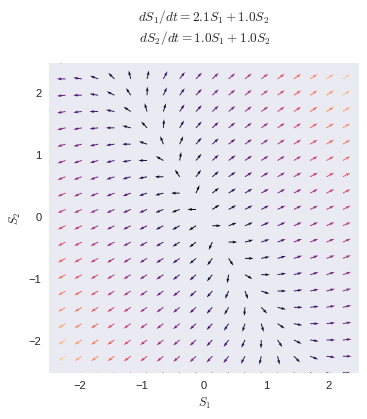

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

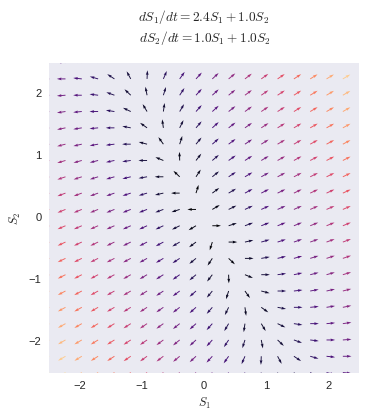

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

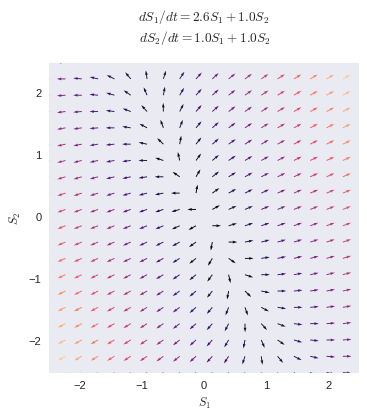

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

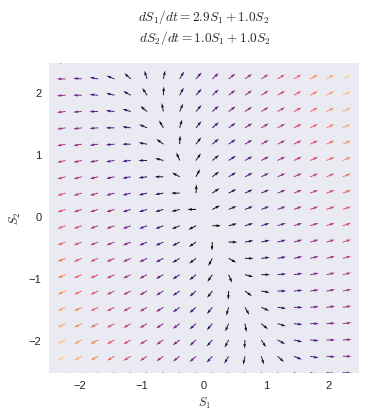

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

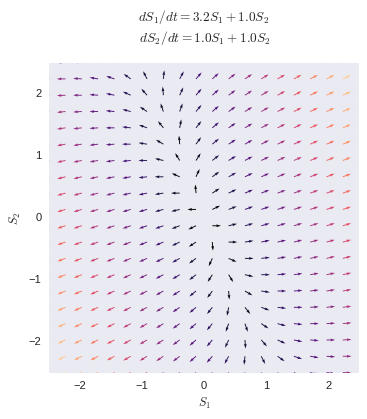

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

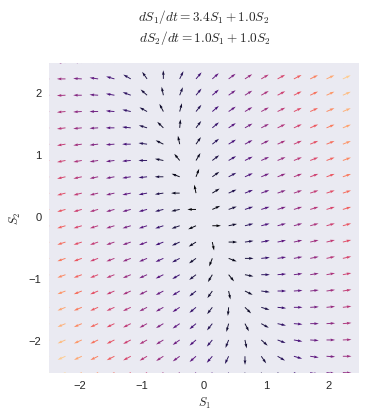

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

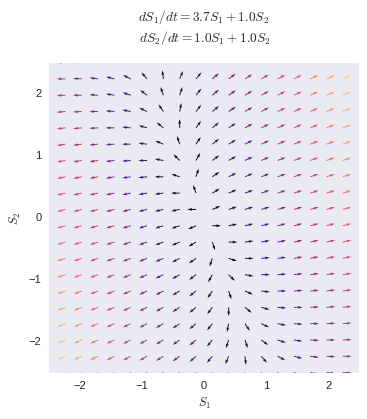

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

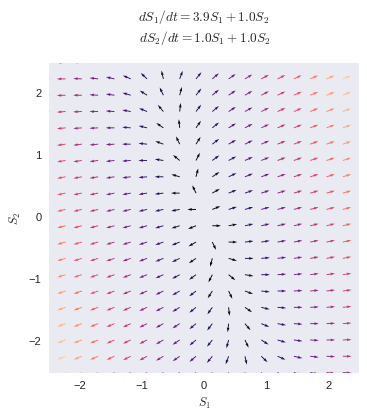

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

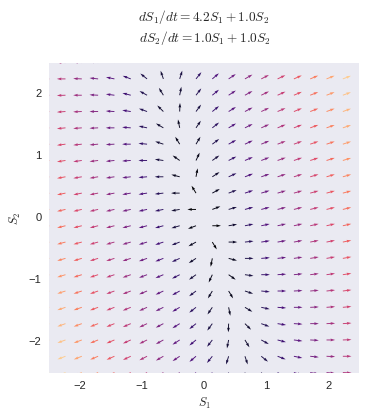

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

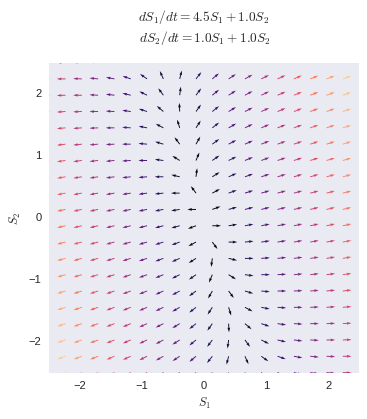

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

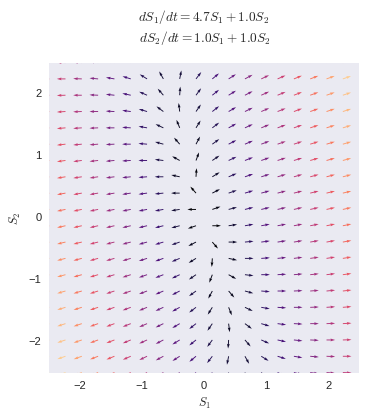

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

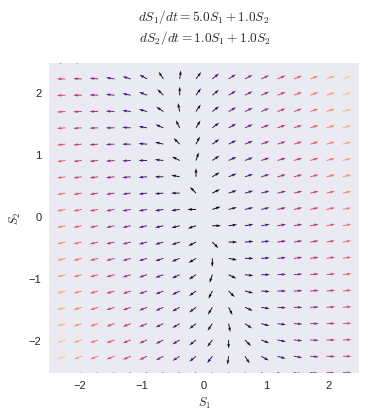

<IPython.core.display.Javascript object>

In [ ]:
lst_c = np.linspace(0, 5, 20)

tb = widgets.TabBar([str(i) for i in range(len(lst_c))])
for i in range(len(lst_c)):
    # get coefs from widgets
    a1 = lst_c[i]
    a2 = wid_a2.value
    b1 = wid_b1.value
    b2 = wid_b2.value

    # call funcs
    dx1 = dx1_dt(x1, x2)
    dx2 = dx2_dt(x1, x2)

    # scalar
    s = np.sqrt(np.power(dx1, 2) + np.power(dx2, 2))
    # Only select the first 3 tabs, and render others in the background.
    with tb.output_to(i, select=(i < 3)):
        plt.figure(figsize=(5, 5))
        plt.quiver(x1, x2, dx1/s, dx2/s, s, cmap="magma")
        plt.title(
            "$dS_1/dt = {:.1f}S_1 + {:.1f}S_2$ \n $dS_2/dt = {:.1f}S_1 + {:.1f}S_2$ \n".format(
                a1, a2, b1, b2))
        plt.ylabel("$S_2$")
        plt.xlabel("$S_1$")
        plt.xlim(x1lim)
        plt.ylim(x2lim)
        plt.gca().set_aspect('equal')
        plt.grid(False)
        plt.show()

# Integration tutorial - Lokta-Volterra

https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html

## Grid setup

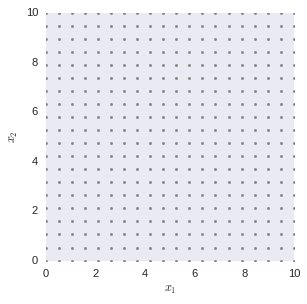

In [ ]:
# Create a grid of points
lv_w = 10
lv_x1lim = [0, lv_w]
lv_x2lim = [0, lv_w]
lv_size = 20
lv_x1, lv_x2 = np.meshgrid(
    np.linspace(lv_x1lim[0], lv_x1lim[1], size),
    np.linspace(lv_x2lim[0], lv_x2lim[1], size)
    )

plt.figure(figsize=(4, 4))
plt.scatter(lv_x1, lv_x2, marker=".", color="tab:grey")
plt.ylabel("$x_2$")
plt.ylim(lv_x2lim)
plt.xlabel("$x_1$")
plt.xlim(lv_x1lim)
plt.gca().set_aspect('equal')
plt.grid(False)
plt.show()

## Array-based Function

In [ ]:
def LV_dX_dt(X, t=0):
    """
    Lotka-Volterra NDE
    Return the growth rate of fox and rabbit populations.

    x1 = Prey
    x2 = Predator

    X = [x1, x2]

    dS1/dt = r1 S_1 - c1 S_1 S_2
    dS2/dt = - r2 S_2 + c2 * S_1 * S_2

    """
    return np.array(
        [ lv_r1 * X[0] - lv_c1 * X[0] * X[1],
         -lv_r2 * X[1] + lv_c2 * X[0] *X[1]])

## Vector Simulation

<ipython-input-564-7d0cdb413af1>:17: RuntimeWarning: invalid value encountered in divide
  plt.quiver(lv_x1, lv_x2, lv_dx1/s, lv_dx2/s, color="blue")#, s, cmap="plasma")


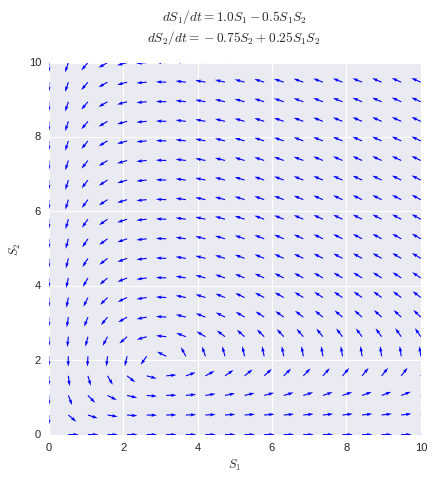

In [ ]:
# Definition of parameters
lv_r1 = 1.0
lv_c1 = 0.5
lv_r2 = 0.75
lv_c2 = 0.25
s_eq1 = "$dS_1/dt = {} S_1 - {} S_1 S_2$ \n".format(lv_r1, lv_c1)
s_eq2 = "$dS_2/dt = - {} S_2 + {} S_1 S_2$ \n".format(lv_r2, lv_c2)

# call function
lv_dx1, lv_dx2 = LV_dX_dt(X=[lv_x1, lv_x2])
# get scalar
s = np.sqrt(np.power(lv_dx1, 2) + np.power(lv_dx2, 2))

plt.figure(figsize=(6, 6))
# normalised arrow size by scalar (cmap feature)
plt.quiver(lv_x1, lv_x2, lv_dx1/s, lv_dx2/s, color="blue")#, s, cmap="plasma")
plt.title(s_eq1 + s_eq2)
plt.ylabel("$S_2$")
plt.xlabel("$S_1$")
plt.xlim(lv_x1lim)
plt.ylim(lv_x2lim)
plt.gca().set_aspect('equal')
#plt.grid(False)
plt.show()

## Solver

In [ ]:
#!python
from scipy import integrate

# time
t = np.linspace(0, 40,  1000)  # time

# Initial conditions
X0 = np.array([8, 2])  # initials conditions: 10 rabbits and 5 foxes

# Integrate
X, infodict = integrate.odeint(LV_dX_dt, X0, t, full_output=True)

Plot evolution

<Figure size 320x320 with 0 Axes>

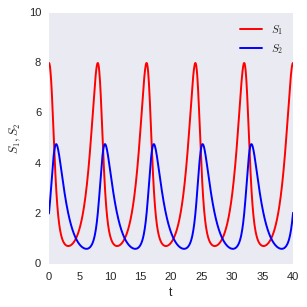

In [ ]:
rabbits, foxes = X.T
plt.figure(figsize=(4, 4))
plt.plot(t, rabbits, 'r-', label='$S_1$')
plt.plot(t, foxes  , 'b-', label='$S_2$')
plt.legend(loc='best')
plt.ylabel("$S_1, S_2$")
plt.ylim([0, lv_w])
plt.xlabel("t")
#plt.xlim(tlim)
#plt.gca().set_aspect('equal')
plt.tight_layout()
plt.grid(False)
#plt.savefig("./fig_LV_ev.jpg".format(folder), dpi=300)
plt.savefig("{}/fig_LV_ev.jpg".format(folder), dpi=300)

Plot phase-portrait

<ipython-input-590-4d3632253dd4>:3: RuntimeWarning: invalid value encountered in divide
  plt.quiver(lv_x1, lv_x2, lv_dx1/s, lv_dx2/s, color="dimgray")#, s, cmap="plasma")


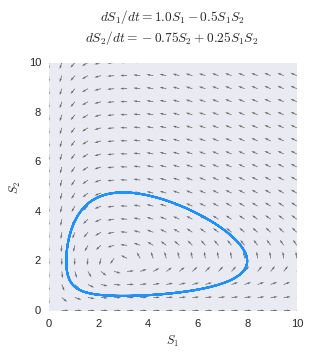

In [ ]:
plt.figure(figsize=(4, 4))
# normalised arrow size by scalar (cmap feature)
plt.quiver(lv_x1, lv_x2, lv_dx1/s, lv_dx2/s, color="dimgray")#, s, cmap="plasma")
plt.plot( X[:,0], X[:,1], color="dodgerblue")

plt.title(s_eq1 + s_eq2)
plt.ylabel("$S_2$")
plt.xlabel("$S_1$")
plt.xlim(lv_x1lim)
plt.ylim(lv_x2lim)
plt.gca().set_aspect('equal')
plt.grid(False)
plt.savefig("{}/fig_LV_pp.jpg".format(folder), dpi=300)

# IO tool

## Functions

In [101]:
def LIN_dX_dt(X, t=0):
    return np.array(
        [a1 * X[0] + a2 * X[1],
         b1 * X[0] + b2 * X[1]])

def LIN_sink(X, t=0):
    return np.array(
        [-0.8 * X[0] + 1.0 * X[1],
         -2.1 * X[0] + 0.0 * X[1]])

def LIN_source(X, t=0):
    return np.array(
        [ 0.4 * X[0] + 2.0 * X[1],
         -2.1 * X[0] + 0.0 * X[1]])

def LIN_growth(X, t=0):
    return np.array(
        [ 0.3 * X[0] + 1.0 * X[1],
         1.1 * X[0] + 1.3 * X[1]])

def LIN_decay(X, t=0):
    return np.array(
        [ -2.5 * X[0] + 1.3 * X[1],
         1.2 * X[0] + -0.9 * X[1]])

def LV(X, t=0):
    """
    Lotka-Volterra NDE
    Return the growth rate of fox and rabbit populations.

    x1 = Prey
    x2 = Predator

    X = [x1, x2]

    dS1/dt = r1 S_1 - c1 S_1 S_2
    dS2/dt = - r2 S_2 + c2 * S_1 * S_2

    lv_r1 = 1.0
    lv_c1 = 0.5
    lv_r2 = 0.75
    lv_c2 = 0.25

    """
    return np.array(
        [ 1.2 * X[0] - 0.5 * X[0] * X[1],
         -0.75 * X[1] + 0.25 * X[0] *X[1]])


def REG(X, t=0):
    return np.array(
        [X[0] + X[1] - (X[0]*((X[0]*X[0]) + (X[1]*X[1]))),
         - X[0] + X[1] - (X[1]*((X[0]*X[0]) + (X[1]*X[1])))])

In [102]:
s_eq1 = "$dS_1/dt = -0.8 S_1 + 1.0 S_2$ \n"
s_eq2 = "$dS_2/dt = - 2.1 S_2 + 0.0 S_2$ \n"
eq_sink = s_eq1 + s_eq2

s_eq3 = "$dS_1/dt = 0.4 S_1 + 2.0 S_2$ \n"
s_eq4 = "$dS_2/dt = - 2.1 S_2 + 0.0 S_2$ \n"
eq_source = s_eq3 + s_eq4

s_eq3 = "$dS_1/dt = 0.3 S_1 + 1.0 S_2$ \n"
s_eq4 = "$dS_2/dt = 1.1 S_2 + 1.3 S_2$ \n"
eq_growth = s_eq3 + s_eq4

s_eq3 = "$dS_1/dt = -2.5 S_1 + 1.3 S_2$ \n"
s_eq4 = "$dS_2/dt = 1.2 S_2 - 0.9 S_2$ \n"
eq_decay = s_eq3 + s_eq4

s_eq3 = "$dS_1/dt = 1.2 S_1 - 0.5 S_1 S_2$ \n"
s_eq4 = "$dS_2/dt = -0.75 S_2 + 0.25 S_1 S_2$ \n"
eq_lv = s_eq3 + s_eq4

s_eq3 = "$dS_1/dt = \sigma (-S_1 + S_2)$ \n"
s_eq4 = "$dS_2/dt = r S_1 - S_2 - S_1 S_3$ \n"
s_eq5 = "$dS_3/dt = - b S_3 + S_1 S_2$ \n"
eq_lorenz = s_eq3 + s_eq4 + s_eq5

s_eq3 = "$dS_1/dt = S_1 + S_2 - S_1 ({S_1}^2 + {S_2}^2)$ \n"
s_eq4 = "$dS_2/dt = - S_1 + S_2 - S_2 ({S_1}^2 + {S_2}^2)$ \n"
eq_reg = s_eq3 + s_eq4

funcs = {
    "Sink": {
        "Func": LIN_sink,
        "Eqs": eq_sink,
        "X0":  [1, 1],
        "tlim": [0, 17.5],
    },
    "Source": {
        "Func": LIN_source,
        "Eqs": eq_source,
        "X0":  [0.02, -0.02],
        "tlim": [0, 17.5],
    },
    "Growth": {
        "Func": LIN_growth,
        "Eqs": eq_growth,
        "X0":  [0.02, -0.02],
        "tlim": [0, 17.5],
    },
    "Decay": {
        "Func": LIN_decay,
        "Eqs": eq_decay,
        "X0":  [0.02, -0.02],
        "tlim": [0, 17.5],
    },
    "LV": {
        "Func": LV,
        "Eqs": eq_lv,
        "X0":  [0.02, -0.02],
        "tlim": [0, 17.5],
    },
    "Reg": {
        "Func": REG,
        "Eqs": eq_reg,
        "X0":  [5, 5, 5],
        "tlim": [0, 100],
    }
}
func_picker = ipywidgets.Dropdown(
    options=list(funcs.keys()))#, value=list(funcs.keys())[0])


## Main routine

In [4]:
def plot_grid(s1, s2, s1lim, s2lim):
    plt.figure(figsize=(4, 4))
    plt.scatter(s1, s2, marker=".", color="tab:grey")
    plt.xlim(s1lim)
    plt.ylim(s2lim)
    plt.xlabel("$S_1$")
    plt.ylabel("$S_2$")
    plt.gca().set_aspect('equal')
    plt.grid(False)
    plt.show()

def plot_pp(X, t, stitle, s1, s2, ds1, ds2, s, s1lim, s2lim,
    normalize=True, bcmap=False,
    cmap="plasma", color="blue",
    name="pp", save=True):

    # Deploy figure
    fig = plt.figure(figsize=(12, 4))  # Width, Height
    gs = mpl.gridspec.GridSpec(
        1, 3,
        wspace=0.25,
        hspace=0.1,
        left=0.1,
        bottom=0.15,
        top=0.85,
        right=0.95
    )
    fig.suptitle(stitle)

    # plot phase
    plt.subplot(gs[:, 0:1])
    if normalize:
        ds1 = ds1/s
        ds2 = ds2/s
    # plot vectors
    if bcmap:
        plt.quiver(s1, s2, ds1, ds2, s, cmap=cmap)
    else:
        plt.quiver(s1, s2, ds1, ds2, color=color)

    # plot solution
    plt.plot(X[:,0], X[:,1], color="dodgerblue")
    plt.ylabel("$S_2$")
    plt.xlabel("$S_1$")
    plt.xlim(s1lim)
    plt.ylim(s2lim)
    #plt.gca().set_aspect('equal')
    plt.grid(False)

    # plot evolution
    plt.subplot(gs[:, 1:])
    rabbits, foxes = X.T
    plt.plot(t, rabbits, 'r-', label='$S_1$')
    plt.plot(t, foxes  , 'b-', label='$S_2$')
    plt.legend(loc='best')
    plt.ylabel("$S_1, S_2$")
    plt.ylim(s2lim)
    plt.xlabel("t")
    #plt.grid(False)

    #plt.savefig("./fig_{}.jpg".format(name), dpi=300)
    if save:
        plt.savefig("{}/fig_patt_{}.jpg".format(folder, name), dpi=300)
    else:
        plt.show()


def simulate(dict_func, s1lim, s2lim, tlim, s1t0, s2t0, n_grid=20, name="name", save=False):
    # set grid
    s1, s2 = np.meshgrid(
        np.linspace(s1lim[0], s1lim[1], n_grid),
        np.linspace(s2lim[0], s2lim[1], n_grid)
        )
    #plot_grid(s1, s2, s1lim, s2lim)

    # get vectors
    # call function
    ds1, ds2 = dict_func["Func"](X=[s1, s2])
    # get scalar
    s = np.sqrt(np.power(ds1, 2) + np.power(ds2, 2))

    # solve IVP
    # time
    t = np.linspace(tlim[0], tlim[1],  5000)  # time

    # Initial conditions
    X0 = np.array([s1t0, s2t0])  # initials conditions: 10 rabbits and 5 foxes

    # Integrate
    X, infodict = integrate.odeint(dict_func["Func"], X0, t, full_output=True)

    # plot phase-portrait


    plot_pp(
        X, t,
        dict_func["Eqs"],
        s1, s2, ds1, ds2, s, s1lim, s2lim,
        normalize=False, bcmap=False,
        cmap="plasma", color="dimgray",
        name=name, save=save
    )






## Run

In [103]:
func_picker

Dropdown(options=('Sink', 'Source', 'Growth', 'Decay', 'LV', 'Reg'), value='Sink')

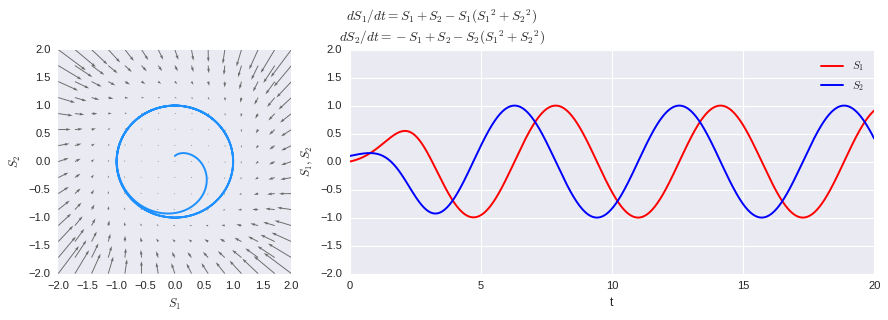

In [105]:
simulate(
    dict_func=funcs[func_picker.value],
    s1lim=[-2, 2],
    s2lim=[-2, 2],
    n_grid=15,
    tlim=[0, 20],
    s1t0=0,
    s2t0=0.1,
    name=func_picker.value,
    save=False
)

## Lorenz

In [87]:
def Lorenz(X, t=0):
    """
    Lorenz Equations NDE

    X = [s1, s2, s3]

    dS1/dt = sigma (-S_1 + S_2)
    dS2/dt = r S_1 - S_2 - S_1 S_3
    dS3/dt = - b S_3 + S_1 S_2

    c1 = 1.0
    c2 = 0.5
    c3 = 0.3
    """
    sigma = 10
    r = 25
    b = 8/3
    return np.array(
        [ sigma * (-X[0] + X[1]),
         (r * X[0]) - X[1] - (X[0] * X[2]),
         (-b * X[2]) + (X[0] * X[1])])

s_eq3 = "$dS_1/dt = 10 (-S_1 + S_2)$ \n"
s_eq4 = "$dS_2/dt = 25 S_1 - S_2 - S_1 S_3$ \n"
s_eq5 = "$dS_3/dt = - 2.6 S_3 + S_1 S_2$ \n"
eq_lorenz = s_eq3 + s_eq4 + s_eq5

funcs["Lorenz"] = {
        "Func": Lorenz,
        "Eqs": eq_lorenz,
        "X0":  [5, 5, 5],
        "tlim": [0, 100],
    }



In [85]:
def plot_pp3(X1, X2, t, stitle, s1, s2, ds1, ds2, s, s1lim, s2lim,
    normalize=True, bcmap=False,
    cmap="plasma", color="blue",
    name="pp", save=True):

    # Deploy figure
    fig = plt.figure(figsize=(12, 4))  # Width, Height
    gs = mpl.gridspec.GridSpec(
        1, 3,
        wspace=0.25,
        hspace=0.1,
        left=0.1,
        bottom=0.10,
        top=0.80,
        right=0.95
    )
    fig.suptitle(stitle)

    # plot phase
    plt.subplot(gs[:, 0:1])
    if normalize:
        ds1 = ds1/s
        ds2 = ds2/s
    # plot vectors
    '''
    if bcmap:
        plt.quiver(s1, s2, ds1[:, :, 0], ds2[:, :, 0], s, cmap=cmap)
    else:
        plt.quiver(s1, s2, ds1[:, :, 0], ds2[:, :, 0], color=color)
    '''
    # plot solution
    plt.plot(X1[:,0], X1[:,2], color="dodgerblue", alpha=0.7)
    plt.plot(X2[:,0], X2[:,2], color="blueviolet", alpha=0.5)
    plt.ylabel("$S_3$")
    plt.xlabel("$S_1$")
    plt.xlim(s1lim)
    plt.ylim(s2lim)
    #plt.gca().set_aspect('equal')
    plt.grid(False)

    # plot evolution
    plt.subplot(gs[:, 1:])
    rabbits, foxes, third = X1.T
    plt.plot(t, third, 'dodgerblue', label='$S_3$ (Sol1)')
    #plt.plot(t, foxes, 'dodgerblue', label='$S_2$ (Sol1)')
    rabbits, foxes, third = X2.T
    plt.plot(t, third  , 'blueviolet', label='$S_3$ (Sol2)')
    #plt.plot(t, foxes, 'blueviolet', label='$S_2$ (Sol2)')
    plt.legend(loc='best')
    plt.ylabel("$S_3$")
    plt.ylim(s2lim)
    plt.xlabel("t")
    #plt.grid(False)

    #plt.savefig("./fig_{}.jpg".format(name), dpi=300)
    if save:
        plt.savefig("{}/fig_patt_{}.jpg".format(folder, name), dpi=300)
    else:
        plt.show()

def simulate3(dict_func, s1lim, s2lim, s3lim, tlim, x1t0, x2t0, n_grid=20, name="name", save=False):
    # set grid
    s1, s2, s3 = np.meshgrid(
        np.linspace(s1lim[0], s1lim[1], n_grid),
        np.linspace(s2lim[0], s2lim[1], n_grid),
        np.linspace(s3lim[0], s3lim[1], n_grid)
        )
    #plot_grid(s1, s2, s1lim, s2lim)

    # get vectors
    # call function
    ds1, ds2, ds3 = dict_func["Func"](X=[s1, s2, s3])

    # get scalar
    s = np.sqrt(np.power(ds1, 2) + np.power(ds2, 2) + np.power(ds3, 2))

    # solve IVP
    # time
    t = np.linspace(tlim[0], tlim[1],  5000)  # time

    # Initial conditions
    X01 = np.array(x1t0)
    X02 = np.array(x2t0)

    # Integrate
    X1, infodict = integrate.odeint(Lorenz, X01, t, full_output=True)
    X2, infodict = integrate.odeint(Lorenz, X02, t, full_output=True)

    # plot phase-portrait

    plot_pp3(
        X1, X2, t,
        dict_func["Eqs"],
        s1, s3, ds1, ds3, s, s1lim, s3lim,
        normalize=False, bcmap=False,
        cmap="plasma", color="dimgray",
        name=name, save=save
    )

    return X1

## Run

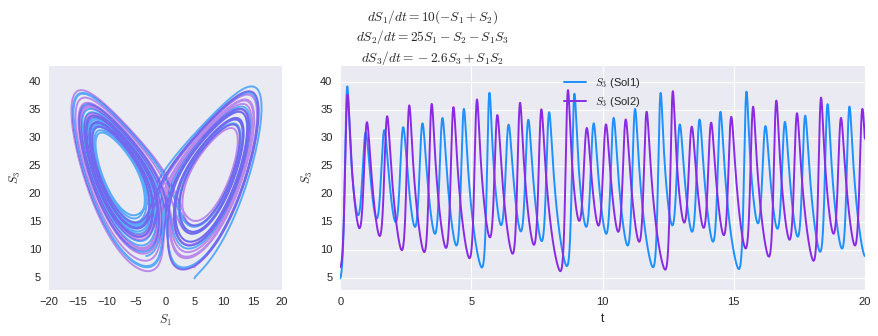

In [88]:
X = simulate3(
    dict_func=funcs["Lorenz"],
    s1lim=[-20, 20],
    s2lim=[-20, 20],
    s3lim=[3, 43],
    n_grid=10,
    tlim=[0, 20],
    x1t0=[5, 5, 5],
    x2t0=[5, 5, 7],
    name="Lorenz2",
    save=True
)
'''
X = simulate3(
    dict_func=funcs["Lorenz"],
    s1lim=[-20, 20],
    s2lim=[0, 40],
    s3lim=[3, 43],
    n_grid=10,
    tlim=[0, 15],
    x1t0=[5, 5, 5],
    x2t0=[5, 5, 7],
    name=func_picker.value,
    save=False
)
'''
print()